# Detect non-stationarity
### Test for the null-hypothesis - it is non-stationary

In [1]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import pandas as pd

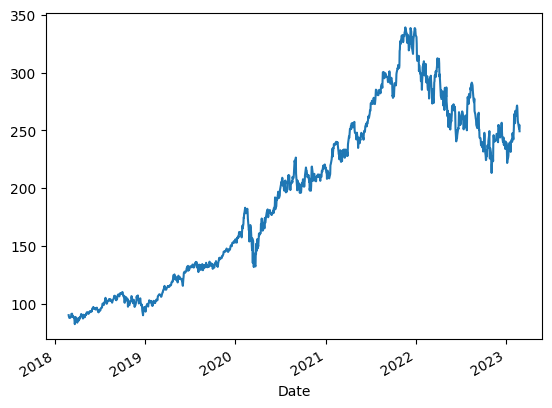

In [2]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# fast access to subset of stock info (opportunistic)
msft.fast_info

# get historical market data for 1 year (max)
hist = msft.history(period="5y")
# plot the close price over time
hist['Close'].plot()
# write out the data to a csv file
hist.to_csv('msft5yr.csv')


p-value:  0.48435422431780517


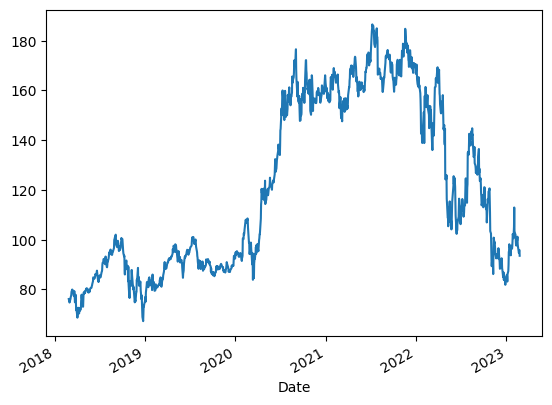

In [8]:
import yfinance as yf

amzn = yf.Ticker("AMZN")

# fast access to subset of stock info (opportunistic)
amzn.fast_info

# get historical market data for 1 year (max)
hist = amzn.history(period="5y")
# plot the close price over time
hist['Close'].plot()
# write out the data to a csv file
hist.to_csv('amzn5yr.csv')
# check hist for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(hist['Close'])
# print p-value
print("p-value: ",adf_result[1])



p-vale of the test is:  0.0


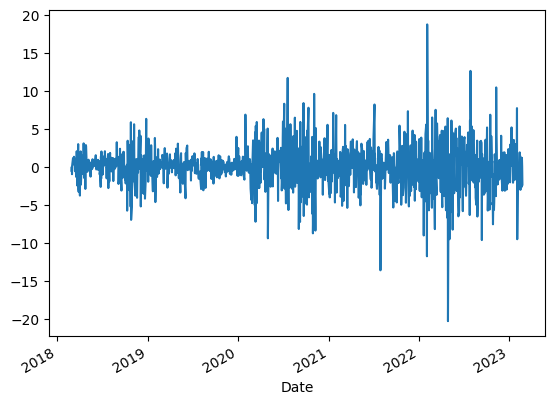

In [7]:
# import adfuller test from the adf module
# get 1 day difference of the close price
diff1 = hist['Close'].diff()
# check for nan valuesxxs
# plot the 1 day difference
diff1.plot()
# check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(diff1.dropna())
# print the p-value of the test
print("p-vale of the test is: ", adf_result[1])










2010-03-10 18:00:00 2011-01-01 00:00:00
                     deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

                     sensor_2  sensor_3  sensor_4  sensor_5  \
date_time                                                     
2010-03-10 18:00:00    1087.8    1056.0    1742.8    1293.4   
2010-03-10 19:00:00     888.2    1197.5    1449.9    1010.9   
2010-03-10 20:00:00     929.6    1060.2    1586.1    1117.0   
2010-03-10 21:00:00     929.0    1102.9    1536.5    1263.2   
2010-03-10 22:00:00     852.7    11

<Axes: xlabel='date_time', ylabel='deg_C'>

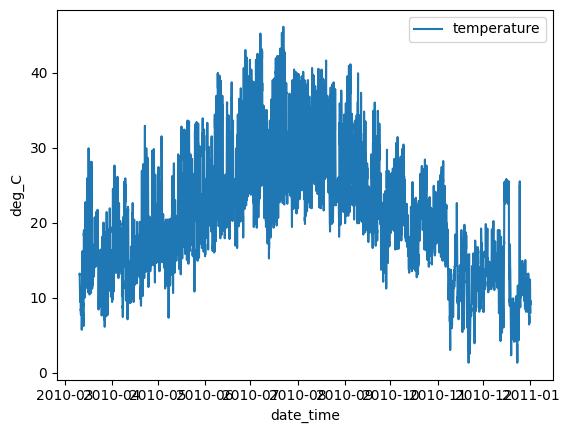

In [3]:
# read data from train.csv  

df = pd.read_csv('train.csv', index_col='date_time', parse_dates=True)

# get statistics on dates and times
print(df.index.min(), df.index.max())
print(df.head())
# plot the data benzene concentration
#sns.lineplot(data=df['target_benzene'][0:24], label='benzene')
# plot the data temperature by hour of day for 3 days label the x axis with only the hour of day
sns.lineplot(data=df['deg_C'], label='temperature')




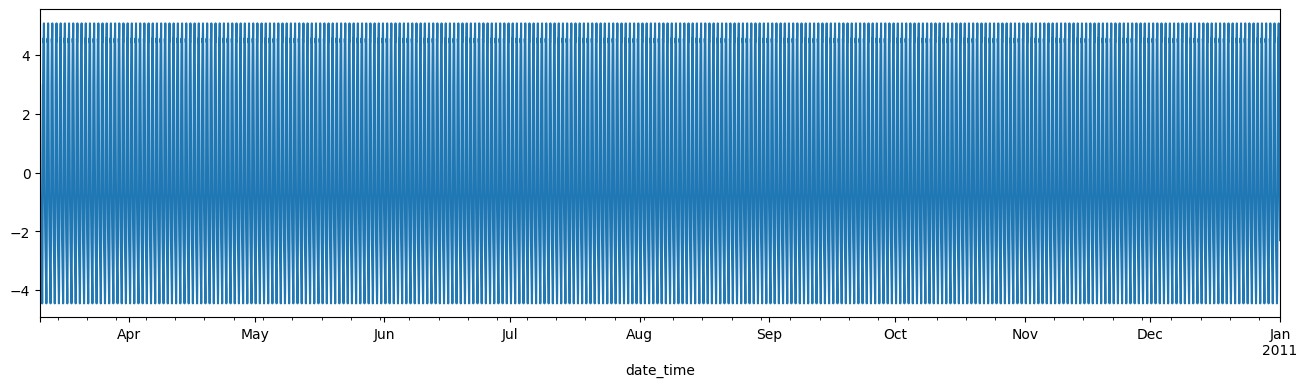

In [9]:
import statsmodels.api as sm
from matplotlib import rcParams
temp = df['deg_C']
decomposition = sm.tsa.seasonal_decompose(df['deg_C'])
rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();



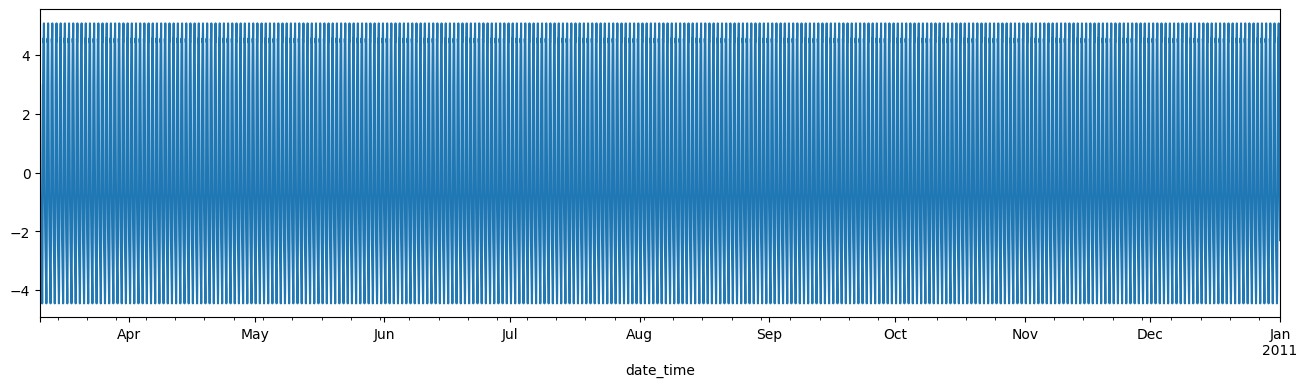

In [10]:
decomposition.seasonal["2010":"2011"].plot();

<Axes: xlabel='date_time', ylabel='target_nitrogen_oxides'>

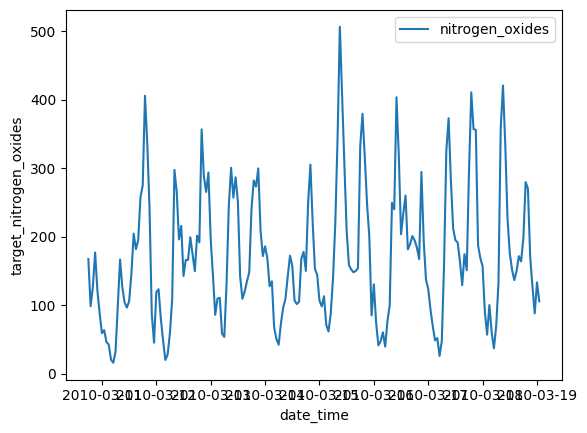

In [19]:
# plot the data nitrogen concentration
sns.lineplot(data=df['target_nitrogen_oxides'][0:200], label='nitrogen_oxides')

In [77]:

# test for stationarity using the Augmented Dickey-Fuller test (ADF) for carbon monoxide
tps = pd.read_csv(
    "train.csv", parse_dates=["date_time"], index_col="date_time"
)
print(type(tps))
test_results = adfuller(tps["target_carbon_monoxide"][0:100])

test_results[1]

NameError: name 'pd' is not defined

In [14]:
# test for stationarity using the Augmented Dickey-Fuller test (ADF) for benzene
tps = pd.read_csv(
    "train.csv", parse_dates=["date_time"], index_col="date_time"
)

test_results = adfuller(tps["target_benzene"])

test_results[1]

1.3715073973957967e-15

In [17]:
# test for stationarity using the Augmented Dickey-Fuller test (ADF) for benzene
tps = pd.read_csv(
    "train.csv", parse_dates=["date_time"], index_col="date_time"
)

test_results = adfuller(tps["target_nitrogen_oxides"])

test_results[1]

8.106358998506035e-07